In [2]:
import math

import numpy as np
import matplotlib.pyplot as plt
import sympy

In [3]:
def derivative(f, x, h=0.001):
    return (f(x + h) - f(x - h)) / (2*h)

In [433]:
class Object:
    def y_coords(self, x):
        pass

    def normal_line_slope(self, y):
        pass

    def collides_with(self, ray_x, ray_y, ray_slope):
        pass

In [434]:
class Circle(Object):
    def __init__(self, x0, y0, radius):
        self.x0 = x0
        self.y0 = y0
        self.r = radius

    def y_coords(self, x):
        return np.sqrt(self.r**2 - (x - self.x0)**2) + self.y0

    def normal_line_slope(self, x):
        return -1 / derivative(self.y_coords, x)

    def collides_with(self, ray_x, ray_y, ray_slope):
        if (ray_slope is np.inf or ray_slope > 10**9) and self.x0 - r <= ray_x <= self.x0 + r:
            return ray_x

        x = sympy.symbols('x')

        eq = (ray_slope * (x - ray_x) + ray_y) - (sympy.sqrt(self.r**2 - (x - self.x0)**2) + self.y0)
        solutions = sympy.solve(eq)

        if len(solutions) > 0:
            for solution in solutions:
                f = solution.evalf()
                print(f)
                if round(f, 8) != round(ray_x, 8):
                    return float(f)
        return None

In [435]:
class Line(Object):
    def __init__(self, x0, x1, y0, y1):
        self.x0 = x0
        self.x1 = x1
        self.y0 = y0
        self.y1 = y1

        self.slope = (self.y1 - self.y0) / (self.x1 - self.x0)
        self.offset = self.y0 - self.slope * self.x0

    def y_coords(self, x):
        return self.slope * x + self.offset

    def normal_line_slope(self, x):
        return np.inf if self.y0 - self.y1 == 0 else -1 / derivative(self.y_coords, x)

    def collides_with(self, ray_x, ray_y, ray_slope):
        if ray_slope is np.inf:
            if self.x0 <= ray_x <= self.x1:
                return ray_x
            return None

        col_x = (ray_slope*ray_x - ray_y + self.offset) / (ray_slope - self.slope)

        if self.x0 <= col_x <= self.x1:
            return col_x

        return None

In [436]:
class Ray:
    def __init__(self, x0, y0, initial_slope=np.inf, initial_dir='R'):
        self.x = x0
        self.y = y0
        self.slope = initial_slope
        self.dir = initial_dir
        self.collisions = 0

        self.points = [(self.x, self.y)]

    def get_collisions(self):
        return self.collisions

    def update(self, x, y, slope, dir, new_collision=True):
        self.points.append((x, y))
        self.x = x
        self.y = y
        self.slope = slope
        self.dir = dir

        if new_collision:
            self.collisions += 1

In [189]:
def point_slope(x_point, y_point, y, slope):
    return (slope * x_point + y - y_point) / slope

In [9]:
def critical_angle(refr_idx_1, refr_idx_2):
    return np.arcsin(refr_idx_2 / refr_idx_1)

In [10]:
def snell_refraction(refr_idx_1, refr_idx_2, angle_1):
    return np.arcsin(np.sin(angle_1) * refr_idx_1 / refr_idx_2)

In [482]:
def trace_ray(ray: Ray, objects, refr_idx, end):
    collisions = []

    for obj in objects:
        collision = obj.collides_with(ray.x, ray.y, ray.slope)

        if collision is None:
            continue

        collision_y = obj.y_coords(collision)
        if collision_y > ray.y:
            collisions.append((collision, collision_y, obj))

    if len(collisions) == 0:
        ray.update(point_slope(ray.x, ray.y, end, ray.slope), end, ray.slope, 'R')
        return ray

    if ray.dir == 'R':
        collisions.sort(key=lambda col: col[1])
    else:
        collisions.sort(key=lambda col: col[1], reverse=True)

    norm_l_slope = collisions[0][2].normal_line_slope(collisions[0][0])
    norm_l_angle = math.atan(norm_l_slope)
    angle_1 = math.pi / 2 + norm_l_angle

    angle_2 = 0

    if ray.collisions % 2 == 0:
        angle_2 = snell_refraction(1, refr_idx, angle_1)
    if ray.collisions % 2 == 1:
        angle_2 = snell_refraction(refr_idx, 1, angle_1)

    if norm_l_angle >= 0:
        ray_slope = np.tan(norm_l_angle + angle_2)
    else:
        ray_slope = np.tan(norm_l_angle - angle_2)

    ray.update(collisions[0][0], collisions[0][1], ray_slope, 'R', new_collision=True)

    print(ray.slope)

    return trace_ray(ray, objects, refr_idx, end)

In [438]:
critical_angle(1.52, 1)

0.7180199093984887

In [461]:
r = 6

circ_1 = Circle(0, 0, r)
line_1 = Line(-r, r, 0, 0)

objects = [line_1, circ_1]

In [423]:
line_1.collides_with(-2, -3, np.inf)

-2

In [484]:
rays[3].points

[(-2.5, -6), (-2.5, 0.0), (-2.5, 5.454356057317857), (1.142244841838019, 20)]

In [483]:
ray = trace_ray(rays[3], objects, 1.5, 20)

1.633123935319537e+16
3.9935931202642165
-2.50000000000000


In [486]:
rays = [Ray(x, -r) for x in np.arange(-4, 4.1, 0.5)]

In [487]:
for ray in rays:
    ray = trace_ray(ray, objects, 1.5, 20)

1.633123935319537e+16
nan
1.633123935319537e+16
2.1098292320006062
-3.49999999999999
1.633123935319537e+16
2.973091331289986


/tmp/ipykernel_18888/1994151469.py:2: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(np.sin(angle_1) * refr_idx_1 / refr_idx_2)


-3.00000000000000
1.633123935319537e+16
3.9935931202642165
-2.50000000000000
1.633123935319537e+16
5.380433048695919
-2.00000000000000
1.633123935319537e+16
7.5481056435405085
-1.50000000000000
1.633123935319537e+16
11.704233673860655
-0.999999999999999
1.633123935319537e+16
23.85366533638103
-0.500000000000000
1.633123935319537e+16
-1.633123935319537e+16
0
1.633123935319537e+16
-23.85366533638103


/tmp/ipykernel_18888/4267201904.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return -1 / derivative(self.y_coords, x)


0.500000000000000
1.633123935319537e+16
-11.704233673860623
0.999999999999999
1.633123935319537e+16
-7.5481056435405085
1.50000000000000
1.633123935319537e+16
-5.3804330486959255
1.99999999999999
1.633123935319537e+16
-3.993593120264209
2.50000000000000
1.633123935319537e+16
-2.9730913312899774
1.633123935319537e+16
-2.1098292320006036
3.50000000000001
1.633123935319537e+16
nan


In [282]:
rays[0].points

[(-4.0, -6),
 (-4.0, 4.47213595499958),
 (-2.766277573410678, 0.0),
 (-2.766277573410683, 5.324256604150959),
 (-2.766277573410688, 5.324256604150957),
 (-4.323181772076411, 0.0),
 (-4.323181772076411, 0.0),
 (-4.3231817720764125, 4.160540753986944),
 (-4.323181772076413, 4.160540753986943),
 (nan, 20),
 (nan, 20),
 (nan, 20),
 (nan, 20),
 (nan, 20),
 (nan, 20),
 (nan, 20),
 (nan, 20),
 (nan, 20),
 (nan, 20),
 (nan, 20),
 (nan, 20)]

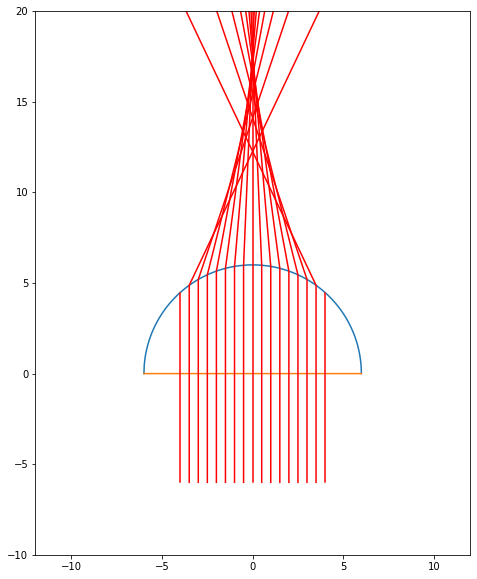

In [488]:
fig, ax = plt.subplots()

x_vals = np.arange(-r, r+0.01, 0.01)
ax.plot(x_vals, circ_1.y_coords(x_vals))
ax.plot(x_vals, line_1.y_coords(x_vals))

for ray in rays:
    ray_points = np.array(ray.points).swapaxes(0, 1)
    ax.plot(ray_points[0], ray_points[1], color='red')

plt.xlim(-r*2, r*2)
plt.ylim(-10, 20)
ax.set_aspect(1)
fig.set_size_inches(10, 10)
plt.show()